# Visualization Scraped Springer Dates

In [218]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [219]:
# load
filename = "dates_df_20000_all_all_journals_keyword_depressivedisorder_depression"
# filename = "dates_df_20000__all_journals_no_keywords"
df = pd.read_csv(f"data/{filename}.csv")
df = df.rename(columns={"1": "Received", "2": "Accepted"})
print(df.shape[0])
df.head()

3324


,Received,Accepted,journal,title
0,2022-10-01,2023-01-06,Clinical Child and Family Psychology Review,Blocking Two-Pore Domain Potassium Channel TRE...
1,2022-10-01,2023-01-06,Research on Child and Adolescent Psychopathology,Blocking Two-Pore Domain Potassium Channel TRE...
2,2022-10-01,2023-01-06,Archives of Gynecology and Obstetrics,Blocking Two-Pore Domain Potassium Channel TRE...
3,2022-10-01,2023-01-06,Journal of Family Violence,Blocking Two-Pore Domain Potassium Channel TRE...
4,2022-10-01,2023-01-06,Molecular Neurobiology,Blocking Two-Pore Domain Potassium Channel TRE...


In [220]:
allowed_journals = ["Psychological Research",
                    "Current Psychology",
                    "Cognitive, Affective, & Behavioral Neuroscience",
                    "International Journal of Cognitive Therapy",
                    "Current Treatment Options in Psychiatry",
                    "European Archives of Psychiatry and Clinical Neuroscience",
                    "BMC Psychiatry",
                    "Academic Psychiatry",
                    "Social Psychiatry and Psychiatric Epidemiology"
                    "Discover Mental Health",
                    "International Journal of Mental Health and Addiction",
                    "Annals of General Psychiatry",
                    ]

df = df[df.journal.isin(allowed_journals)]

In [221]:
df.groupby(["journal"])["journal"].count()

journal
Academic Psychiatry                                          11
Cognitive, Affective, & Behavioral Neuroscience               2
Current Psychology                                           95
Current Treatment Options in Psychiatry                      19
European Archives of Psychiatry and Clinical Neuroscience    94
International Journal of Cognitive Therapy                   18
International Journal of Mental Health and Addiction         40
Psychological Research                                        1
Name: journal, dtype: int64

In [222]:
df["Accepted"] = pd.DataFrame(df["Accepted"].astype("datetime64[us]"))
df["Received"] = pd.DataFrame(df["Received"].astype("datetime64[us]"))

## Data cleaning

### Remove duplicates

In [223]:
print(len(df))
df = df.drop_duplicates(keep="first")
len(df)

280


229

In [224]:
df.groupby(["journal"])["journal"].count()

journal
Academic Psychiatry                                          10
Cognitive, Affective, & Behavioral Neuroscience               2
Current Psychology                                           75
Current Treatment Options in Psychiatry                      18
European Archives of Psychiatry and Clinical Neuroscience    71
International Journal of Cognitive Therapy                   16
International Journal of Mental Health and Addiction         36
Psychological Research                                        1
Name: journal, dtype: int64

## Checks
### Duplicated titles

In [225]:
df[df['title'].duplicated() == True]

,Received,Accepted,journal,title
30,2023-01-15,2023-04-07,European Archives of Psychiatry and Clinical N...,Bifrontal electroconvulsive therapy leads to i...
37,2023-02-16,2023-04-11,International Journal of Cognitive Therapy,Use of weight loss medications in relation wit...
82,2021-02-07,2021-10-01,European Archives of Psychiatry and Clinical N...,Comorbidity Between Internalising and External...
106,2022-04-23,2022-08-02,"Cognitive, Affective, & Behavioral Neuroscience",Validation of medical service insurance claims...
114,2022-12-22,2023-03-15,European Archives of Psychiatry and Clinical N...,Clinicians’ perceptions and practices of diagn...
...,...,...,...,...
3092,2018-01-02,2018-04-17,Current Treatment Options in Psychiatry,Attributions and private theories of mental il...
3214,2017-04-19,2017-08-03,European Archives of Psychiatry and Clinical N...,Histone deacetylases (HDACs) as therapeutic ta...
3225,2017-07-12,2017-11-08,International Journal of Cognitive Therapy,Cigarette demand among smokers with elevated d...
3231,2017-07-12,2017-11-08,European Archives of Psychiatry and Clinical N...,Cigarette demand among smokers with elevated d...


In [226]:
df = df.drop_duplicates(subset=['title'], keep="first")

In [227]:
df.head(50)

,Received,Accepted,journal,title
24,2023-01-06,2023-04-14,European Archives of Psychiatry and Clinical N...,The relationship between psychological distres...
28,2023-01-15,2023-04-07,Current Psychology,Bifrontal electroconvulsive therapy leads to i...
33,2023-02-16,2023-04-11,Current Psychology,Use of weight loss medications in relation wit...
45,2022-08-26,2023-03-28,European Archives of Psychiatry and Clinical N...,Plasma NfL is associated with the APOE ε4 alle...
52,2022-02-23,2023-03-17,Current Psychology,The neuronal and synaptic dynamics underlying ...
59,2022-04-20,2023-03-09,"Cognitive, Affective, & Behavioral Neuroscience",A meta-analysis of internet-based cognitive be...
79,2022-10-02,2023-03-09,European Archives of Psychiatry and Clinical N...,Risk Factors for Postpartum Depression Based o...
81,2021-02-07,2021-10-01,International Journal of Mental Health and Add...,Comorbidity Between Internalising and External...
94,2019-06-10,2023-03-13,International Journal of Mental Health and Add...,Is Social Gender Transition Associated with Me...
98,2022-04-23,2022-08-02,Current Psychology,Validation of medical service insurance claims...


### Journal distribution

In [228]:
df.groupby(["journal"])["journal"].count()

journal
Academic Psychiatry                                           7
Cognitive, Affective, & Behavioral Neuroscience               1
Current Psychology                                           61
Current Treatment Options in Psychiatry                      13
European Archives of Psychiatry and Clinical Neuroscience    46
International Journal of Cognitive Therapy                   10
International Journal of Mental Health and Addiction         27
Name: journal, dtype: int64

### Keyword depression?

In [229]:
for title in df["title"]:
    print(title)

The relationship between psychological distress, depressive symptoms, emotional eating behaviors and the health-related quality of life of middle-aged korean females: a serial mediation model
Bifrontal electroconvulsive therapy leads to improvement of cerebral glucose hypometabolism in frontotemporal dementia with comorbid psychotic depression – a case report
Use of weight loss medications in relation with prostate, colorectal and male breast cancers among older men: SEER-Medicare 2007–2015
Plasma NfL is associated with the APOE ε4 allele, brain imaging measurements of neurodegeneration, and lower recall memory scores in cognitively unimpaired late-middle-aged and older adults
The neuronal and synaptic dynamics underlying post-inhibitory rebound burst related to major depressive disorder in the lateral habenula neuron model
A meta-analysis of internet-based cognitive behavioral therapy for military and veteran populations
Risk Factors for Postpartum Depression Based on Genetic and Epig

## Feature engineering

### Days until accepted

In [230]:
df["days_between"] = df["Accepted"] - df["Received"]
df

,Received,Accepted,journal,title,days_between
24,2023-01-06,2023-04-14,European Archives of Psychiatry and Clinical N...,The relationship between psychological distres...,98 days
28,2023-01-15,2023-04-07,Current Psychology,Bifrontal electroconvulsive therapy leads to i...,82 days
33,2023-02-16,2023-04-11,Current Psychology,Use of weight loss medications in relation wit...,54 days
45,2022-08-26,2023-03-28,European Archives of Psychiatry and Clinical N...,Plasma NfL is associated with the APOE ε4 alle...,214 days
52,2022-02-23,2023-03-17,Current Psychology,The neuronal and synaptic dynamics underlying ...,387 days
...,...,...,...,...,...
3200,2017-12-07,2018-02-28,European Archives of Psychiatry and Clinical N...,Association of depression and anxiety with car...,83 days
3212,2017-04-19,2017-08-03,Current Treatment Options in Psychiatry,Histone deacetylases (HDACs) as therapeutic ta...,106 days
3223,2017-07-12,2017-11-08,Current Treatment Options in Psychiatry,Cigarette demand among smokers with elevated d...,119 days
3272,2017-05-17,2017-08-24,Academic Psychiatry,Neurotrophins and neuroinflammation in fetuses...,99 days


In [231]:
def split_between_1(row):
    return str(row).split(" ")[1]

def split_between_0(row):
    return str(row).split(" ")[0]

In [232]:
df["unit"] = df["days_between"].apply(split_between_1)
df["between"] = df["days_between"].apply(split_between_0)

In [233]:
df["between"] = df["between"].astype(int)

In [234]:
df.unit.unique()

array(['days'], dtype=object)

In [235]:
df = df.drop(["unit", "days_between"], axis=1)
df

,Received,Accepted,journal,title,between
24,2023-01-06,2023-04-14,European Archives of Psychiatry and Clinical N...,The relationship between psychological distres...,98
28,2023-01-15,2023-04-07,Current Psychology,Bifrontal electroconvulsive therapy leads to i...,82
33,2023-02-16,2023-04-11,Current Psychology,Use of weight loss medications in relation wit...,54
45,2022-08-26,2023-03-28,European Archives of Psychiatry and Clinical N...,Plasma NfL is associated with the APOE ε4 alle...,214
52,2022-02-23,2023-03-17,Current Psychology,The neuronal and synaptic dynamics underlying ...,387
...,...,...,...,...,...
3200,2017-12-07,2018-02-28,European Archives of Psychiatry and Clinical N...,Association of depression and anxiety with car...,83
3212,2017-04-19,2017-08-03,Current Treatment Options in Psychiatry,Histone deacetylases (HDACs) as therapeutic ta...,106
3223,2017-07-12,2017-11-08,Current Treatment Options in Psychiatry,Cigarette demand among smokers with elevated d...,119
3272,2017-05-17,2017-08-24,Academic Psychiatry,Neurotrophins and neuroinflammation in fetuses...,99


## Checks

In [236]:
pd.DataFrame(df.groupby(["journal", "between"])["between"].count()).tail(50)

between
journal                                            between         
European Archives of Psychiatry and Clinical Ne... 194            1
                                                   206            1
                                                   211            1
                                                   214            1
                                                   218            1
                                                   220            1
                                                   222            1
                                                   246            1
                                                   250            1
                                                   254            1
                                                   280            1
                                                   295            2
                                                   429            1
                                                   445            1
International Journal of Cognitive Therapy         61             1
                                                   81             1
                                                   99             1
                                                   100            1
                                                   103            1
                                                   107            1
                                                   150            1
                                                   180            1
                                                   237            1
                                                   280            1
International Journal of Mental Health and Addi... 56             1
                                                   66             1
                                                   70             1
                                                   76             1
                                                   77             2
                                                   79             1
                                                   93             1
                                                   96             1
                                                   104            1
                                                   106            1
                                                   118            1
                                                   125            1
                                                   128            1
                                                   135            1
                                                   152            1
                                                   158            1
                                                   192            1
                                                   198            1
                                                   216            1
                                                   236            1
                                                   249            1
                                                   293            1
                                                   325            1
                                                   361            1
                                                   437            1
                                                   1372           1

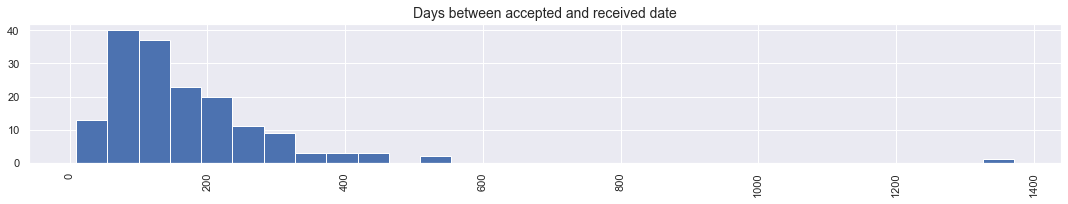

In [237]:
plt.figure(figsize=(15,3))
plt.hist(df.between.sort_values(), bins=30);
plt.xticks(rotation=90);
plt.title("Days between accepted and received date", fontsize=14);
plt.tight_layout()

In [238]:
df = df[df.between < 1200]

In [239]:
fig = px.violin(df, y="between", box=True, points='all')
fig.update_layout(title={'text': "Days between accepted and received date"},
                  xaxis_title="",
                  yaxis_title="Days",
                  showlegend=False)
fig.show()

Text(0.5, 0, '')

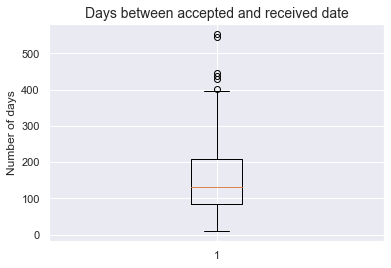

In [240]:
plt.boxplot(df.between);
plt.title("Days between accepted and received date", fontsize=14);
plt.ylabel("Number of days")
plt.xlabel("")

In [241]:
print(f"Minimum nr of days between accepted and received:\n{df.between.min()}")
print(f"\nMaximum nr of days between accepted and received:\n{df.between.max()}")
print(f"\nAverage nr of days between accepted and received:\n{np.round(df.between.mean(), 2)}")

Minimum nr of days between accepted and received:
9

Maximum nr of days between accepted and received:
554

Average nr of days between accepted and received:
160.23


In [242]:
df

,Received,Accepted,journal,title,between
24,2023-01-06,2023-04-14,European Archives of Psychiatry and Clinical N...,The relationship between psychological distres...,98
28,2023-01-15,2023-04-07,Current Psychology,Bifrontal electroconvulsive therapy leads to i...,82
33,2023-02-16,2023-04-11,Current Psychology,Use of weight loss medications in relation wit...,54
45,2022-08-26,2023-03-28,European Archives of Psychiatry and Clinical N...,Plasma NfL is associated with the APOE ε4 alle...,214
52,2022-02-23,2023-03-17,Current Psychology,The neuronal and synaptic dynamics underlying ...,387
...,...,...,...,...,...
3200,2017-12-07,2018-02-28,European Archives of Psychiatry and Clinical N...,Association of depression and anxiety with car...,83
3212,2017-04-19,2017-08-03,Current Treatment Options in Psychiatry,Histone deacetylases (HDACs) as therapeutic ta...,106
3223,2017-07-12,2017-11-08,Current Treatment Options in Psychiatry,Cigarette demand among smokers with elevated d...,119
3272,2017-05-17,2017-08-24,Academic Psychiatry,Neurotrophins and neuroinflammation in fetuses...,99


### Extract received dates

In [243]:
df['date'] = list(df['Received'].dt.year.astype(str) + "-" + df['Received'].dt.month.astype(str))
df["received_month"] = list(df['Received'].dt.month.astype(str))

C:\Users\samve\AppData\Local\Temp\ipykernel_8828\1980044147.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\samve\AppData\Local\Temp\ipykernel_8828\1980044147.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [244]:
df

,Received,Accepted,journal,title,between,date,received_month
24,2023-01-06,2023-04-14,European Archives of Psychiatry and Clinical N...,The relationship between psychological distres...,98,2023-1,1
28,2023-01-15,2023-04-07,Current Psychology,Bifrontal electroconvulsive therapy leads to i...,82,2023-1,1
33,2023-02-16,2023-04-11,Current Psychology,Use of weight loss medications in relation wit...,54,2023-2,2
45,2022-08-26,2023-03-28,European Archives of Psychiatry and Clinical N...,Plasma NfL is associated with the APOE ε4 alle...,214,2022-8,8
52,2022-02-23,2023-03-17,Current Psychology,The neuronal and synaptic dynamics underlying ...,387,2022-2,2
...,...,...,...,...,...,...,...
3200,2017-12-07,2018-02-28,European Archives of Psychiatry and Clinical N...,Association of depression and anxiety with car...,83,2017-12,12
3212,2017-04-19,2017-08-03,Current Treatment Options in Psychiatry,Histone deacetylases (HDACs) as therapeutic ta...,106,2017-4,4
3223,2017-07-12,2017-11-08,Current Treatment Options in Psychiatry,Cigarette demand among smokers with elevated d...,119,2017-7,7
3272,2017-05-17,2017-08-24,Academic Psychiatry,Neurotrophins and neuroinflammation in fetuses...,99,2017-5,5


In [245]:
fig = px.strip(df, x="date", y="between")
fig.show()

In [246]:
import plotly.graph_objects as go

fig = go.Figure()
for date in df.date.unique():
    fig.add_trace(go.Violin(x=df['date'][df['date'] == date],
                            y=df['between'][df['date'] == date],
                            name=date,
                            box_visible=True,
                            meanline_visible=True))

fig.show()

In [247]:
fig = go.Figure()
for date in df.date.unique():
    fig.add_trace(go.Box(x=df['date'][df['date'] == date],
                            y=df['between'][df['date'] == date],
                            name=date))
fig.update_layout(title={'text': "Days until accepted per received date"},
                  xaxis_title="Received date",
                  yaxis_title="Days until accepted",
                  showlegend=False)
fig.show()

In [248]:
# fig = go.Figure(layout_yaxis_range=[-50,800])
# for month in df.received_month.unique():
#     fig.add_trace(go.Box(x=df['date'][df['date'] == date],
#                             y=df['between'][df['date'] == date],
#                             name=date))

# # style
# # fig.update_xaxes(categoryorder='array', categoryarray=np.arange(0,13,1))
# fig.update_layout(title={'text': "Days until accepted per received month"},
#                   showlegend=False)

# fig.show()

In [249]:
df = df[df.between < 800]

In [250]:
fig = go.Figure(layout_yaxis_range=[-180,800])
for month in df.received_month.unique():
    fig.add_trace(go.Violin(x=df['received_month'][df['received_month'] == month],
                            y=df['between'][df['received_month'] == month],
                            name=month,
                            box_visible=True,
                            meanline_visible=True))
fig.update_xaxes(categoryorder='array', categoryarray=np.arange(0, 12, 1))
fig.update_layout(title={'text': "Days until accepted per received month"},
                  xaxis_title="Received date",
                  yaxis_title="Days until accepted",
                  showlegend=False)
fig.show()

In [251]:
def plot_accepted_pm(data, title):
    fig = go.Figure(layout_yaxis_range=[-50,800])
    for month in data.received_month.unique():
        fig.add_trace(go.Box(x=data['received_month'][data['received_month'] == month],
                                y=data['between'][data['received_month'] == month],
                                name=month))

    # style
    fig.update_xaxes(categoryorder='array', categoryarray=np.arange(0,13,1))
    fig.update_layout(
        title={'text': f"Days until accepted per received month - {title}"},
                    xaxis_title="Received date",
                    yaxis_title="Days until accepted",
                    showlegend=False)

    fig.show()
    # fig.to_image(format="png", engine="kaleido")
    # fig.write_image(f"results/per_journal_{title}.png") # requires kaleido package
plot_accepted_pm(df, "all")

In [252]:
for journal in df.journal.unique():
    print(journal)
    plot_accepted_pm(df[df.journal == journal], journal)

European Archives of Psychiatry and Clinical Neuroscience


Current Psychology


Cognitive, Affective, & Behavioral Neuroscience


International Journal of Mental Health and Addiction


Academic Psychiatry


Current Treatment Options in Psychiatry


International Journal of Cognitive Therapy


## Split

In [253]:
df_accepted = pd.DataFrame(df["Accepted"])
# df_accepted["journal"] = df["journal"]
df_accepted.head()

,Accepted
24,2023-04-14
28,2023-04-07
33,2023-04-11
45,2023-03-28
52,2023-03-17


In [254]:
df_received = pd.DataFrame(df["Received"])
# df_received["journal"] = df["journal"]
df_received.head()

,Received
24,2023-01-06
28,2023-01-15
33,2023-02-16
45,2022-08-26
52,2022-02-23


#### Extract columns

In [255]:
# extract columns
df_accepted["year"] = df_accepted["Accepted"].dt.year
df_accepted["month"] = df_accepted["Accepted"].dt.month
df_accepted["day"] = df_accepted["Accepted"].dt.day
df_accepted.head()

,Accepted,year,month,day
24,2023-04-14,2023,4,14
28,2023-04-07,2023,4,7
33,2023-04-11,2023,4,11
45,2023-03-28,2023,3,28
52,2023-03-17,2023,3,17


#### Count per month

In [256]:
# total articles received per month per year
df_accepted_long = df_accepted.groupby(["year", "month"])["month"].count()

# turn multi index to columns
df_accepted_per_month = df_accepted_long.index.to_frame(name=['year', 'month'], index=False)
df_accepted_per_month["total"] = df_accepted_long.values
df_accepted_per_month = df_accepted_per_month.round(1)
df_accepted_per_month.head()

,year,month,total
0,2016,12,1
1,2017,8,2
2,2017,11,2
3,2017,12,1
4,2018,2,2


In [257]:
# total articles received per month per separate year
df_accepted_long = pd.DataFrame(df_accepted_long)
df_accepted_long

month
year month       
2016 12         1
2017 8          2
     11         2
     12         1
2018 2          2
     4          3
     5          1
     6          1
     7          1
     9          4
     10         2
     11         5
2019 1          1
     2          1
     3          1
     5          1
     6          1
     7          2
     9          2
     10         3
     11         3
2020 1          4
     2          1
     3          2
     5          1
     6          2
     7          1
     8          1
     9          3
     10         3
     11         3
     12         5
2021 1          6
     2          4
     3          1
     4          2
     5          1
     6          1
     7          6
     8          2
     9          2
     10         5
     11         1
     12         2
2022 1          2
     2          5
     3          5
     4          3
     5          3
     6          6
     7          4
     8          8
     9          2
     10         1
     11         4
     12         8
2023 1          2
     2          3
     3          6
     4          3

In [258]:
df_accepted_long.index = df_accepted_long.index.set_names(['index1', 'index2'])

### Received

#### Extract columns

In [259]:
# extract columns
df_received["year"] = df_received["Received"].dt.year
df_received["month"] = df_received["Received"].dt.month
df_received["day"] = df_received["Received"].dt.day
print(df_received.shape[0])
df_received.head(15)

164


,Received,year,month,day
24,2023-01-06,2023,1,6
28,2023-01-15,2023,1,15
33,2023-02-16,2023,2,16
45,2022-08-26,2022,8,26
52,2022-02-23,2022,2,23
59,2022-04-20,2022,4,20
79,2022-10-02,2022,10,2
81,2021-02-07,2021,2,7
98,2022-04-23,2022,4,23
112,2022-11-28,2022,11,28


#### Count per month

In [260]:
# total articles received per month per year
df_received_long = df_received.groupby(["year", "month"])["month"].count()

# turn multi index to columns
df_received_per_month = df_received_long.index.to_frame(name=['year', 'month'], index=False)
df_received_per_month["total"] = df_received_long.values
df_received_per_month = df_received_per_month.round(1)
df_received_per_month.head(15)

,year,month,total
0,2016,9,1
1,2017,4,1
2,2017,5,1
3,2017,7,1
4,2017,9,3
5,2017,10,1
6,2017,12,2
7,2018,1,3
8,2018,2,3
9,2018,3,1


In [261]:
df_per_month = df_received_per_month.merge(df_accepted_per_month, "outer", on=["year", "month"],suffixes=["_received", "_accepted"])
df_per_month

,year,month,total_received,total_accepted
0,2016,9,1.0,NaN
1,2017,4,1.0,NaN
2,2017,5,1.0,NaN
3,2017,7,1.0,NaN
4,2017,9,3.0,NaN
...,...,...,...,...
68,2017,8,NaN,2.0
69,2017,11,NaN,2.0
70,2021,11,NaN,1.0
71,2023,3,NaN,6.0


In [262]:
df_per_month["date"] = list(df_per_month.year.astype(str) + "-" + df_per_month.month.astype(str))

In [263]:
print(len(df_per_month))
print(df_per_month.total_received.sum())
print(df_per_month.total_accepted.sum())

73
164.0
164.0


In [264]:
df_per_month["datetime"] = df_per_month.date.astype("datetime64[m]")
df_per_month = df_per_month.sort_values(by="datetime")
df_per_month.reset_index(drop=True)

,year,month,total_received,total_accepted,date,datetime
0,2016,9,1.0,NaN,2016-9,2016-09-01
1,2016,12,NaN,1.0,2016-12,2016-12-01
2,2017,4,1.0,NaN,2017-4,2017-04-01
3,2017,5,1.0,NaN,2017-5,2017-05-01
4,2017,7,1.0,NaN,2017-7,2017-07-01
...,...,...,...,...,...,...
68,2022,12,1.0,8.0,2022-12,2022-12-01
69,2023,1,3.0,2.0,2023-1,2023-01-01
70,2023,2,1.0,3.0,2023-2,2023-02-01
71,2023,3,NaN,6.0,2023-3,2023-03-01


## Plotting

### Total per month per year

In [265]:
# plotting received
fig = px.line(df_per_month, x="month", y="total_received", color="year", title="layout.hovermode='x unified'")
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x unified", title="Total number of received articles per month")
fig.show()

In [266]:
# # plotting received
# fig = px.line(df_per_month, x="month", y="total_received", color="journal", title="layout.hovermode='x unified'")
# fig.update_traces(mode="markers+lines", hovertemplate=None)
# fig.update_layout(hovermode="x unified", title="Total number of received articles per month")
# fig.show()

In [267]:
# plotting accepted
fig = px.line(df_per_month, x="month", y="total_accepted", color="year", title="layout.hovermode='x unified'")
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x unified", title="Total number of accepted articles per month")
fig.show()

In [287]:
df_per_month.total_accepted.sum(), df_per_month.total_received.sum()

(164.0, 164.0)

In [288]:
df_per_month

,year,month,total_received,total_accepted,date,datetime
0,2016,9,1.0,NaN,2016-9,2016-09-01
67,2016,12,NaN,1.0,2016-12,2016-12-01
1,2017,4,1.0,NaN,2017-4,2017-04-01
2,2017,5,1.0,NaN,2017-5,2017-05-01
3,2017,7,1.0,NaN,2017-7,2017-07-01
...,...,...,...,...,...,...
64,2022,12,1.0,8.0,2022-12,2022-12-01
65,2023,1,3.0,2.0,2023-1,2023-01-01
66,2023,2,1.0,3.0,2023-2,2023-02-01
71,2023,3,NaN,6.0,2023-3,2023-03-01


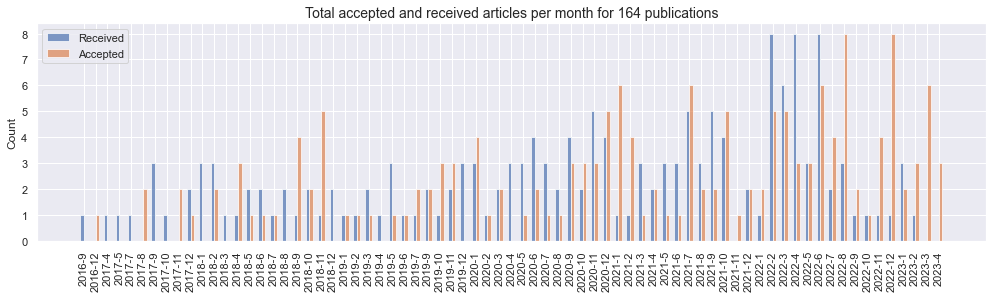

In [268]:
# parameters
width = 0.3
x_labels = df_per_month.date
x = np.arange(0, len(x_labels))

# plotting
plt.figure(figsize=(17,4))
ax = plt.subplot(111)
ax.bar(x, df_per_month.total_received, label="Received", alpha=0.7, width=width)
ax.bar(x + width, df_per_month.total_accepted, label="Accepted", alpha=0.7, width=width)

# styling
plt.title(f"Total accepted and received articles per month for {len(df)} publications", fontsize=14)
plt.xticks(x + width/2, x_labels, rotation=90);
plt.ylabel("Count")
plt.legend(loc="upper left")
plt.savefig(f"results/results_{filename}")

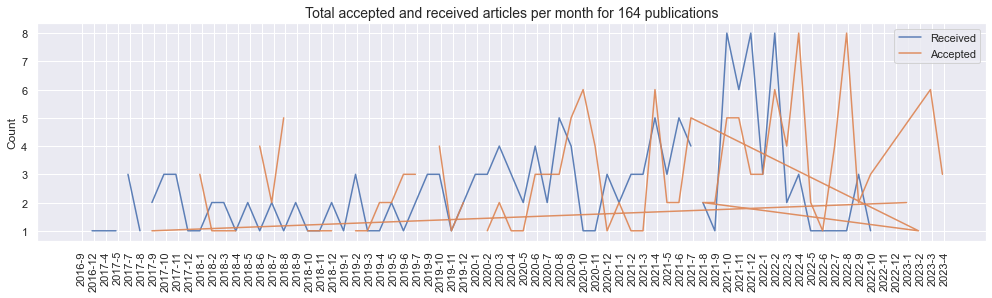

In [269]:
plt.figure(figsize=(17,4))
df_per_month.total_received.plot(label="Received", alpha=0.9)
df_per_month.total_accepted.plot(label="Accepted", alpha=0.9)

# styling
plt.title(f"Total accepted and received articles per month for {len(df)} publications", fontsize=14)
plt.xticks(x + width/2, x_labels, rotation=90);
plt.ylabel("Count")
plt.legend()

Text(0, 0.5, 'Count')

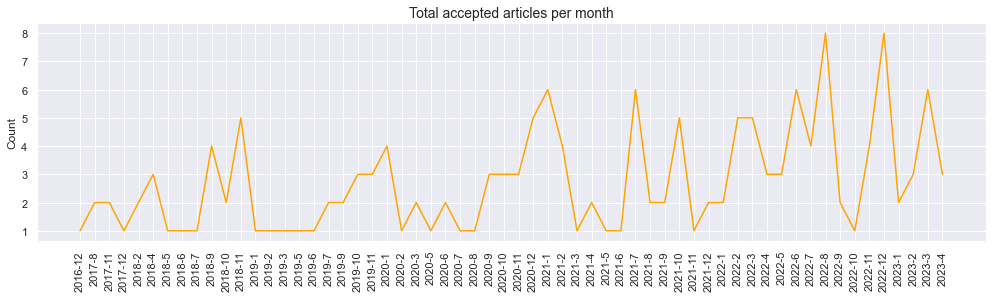

In [270]:
plt.figure(figsize=(17,4))
df_accepted_per_month.total.plot(color="orange")
plt.title("Total accepted articles per month", fontsize=14)
x_labels = list(df_accepted_per_month.year.astype(str) + "-" + df_accepted_per_month.month.astype(str))
plt.xticks(np.arange(0, len(x_labels)), x_labels, rotation=90);
plt.ylabel("Count")

Text(0.5, 1.0, 'Total received and accepted articles per month for multiple years')

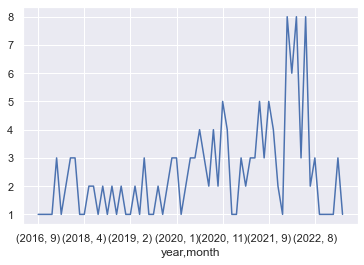

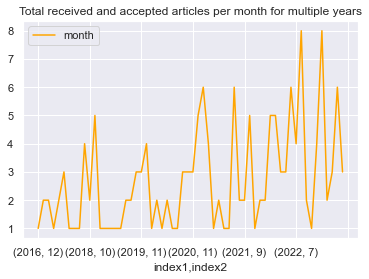

In [271]:
df_received_long.plot()
df_accepted_long.plot(color="orange")
plt.title("Total received and accepted articles per month for multiple years")

### Total per month

Text(0, 0.5, 'Count')

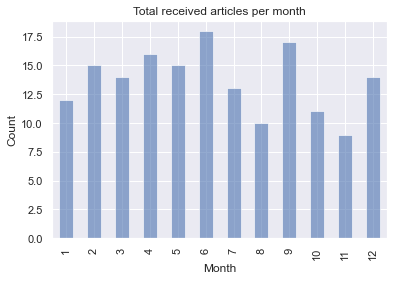

In [272]:
# plotting received
df_received.groupby(df_received.month)["month"].count().plot(kind="bar", alpha=0.6, legend=False)
plt.title("Total received articles per month")
plt.xlabel("Month")
plt.ylabel("Count")
# smooth_plot(df_received.groupby(df_received["Received"].dt.month).count(), "lightblue", "Received")

In [284]:
# plotting accepted
df_accepted.groupby(df_accepted.month)["month"].count().sum()

51

Text(0, 0.5, 'Count')

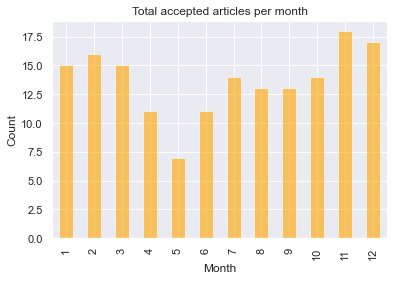

In [274]:
# plotting accepted
df_accepted.groupby(df_accepted.month)["month"].count().plot(kind="bar", alpha=0.6, color="orange", legend=False)
plt.title("Total accepted articles per month")
plt.xlabel("Month")
plt.ylabel("Count")
# smooth_plot(df_accepted.groupby(df_accepted["Accepted"].dt.month).count(), "orange", "Accepted")

### Comparison

In [299]:
df_per_month.groupby(df_per_month.month)["total_received"].sum()

164.0

In [301]:
df_accepted.groupby(df_accepted.month)["month"].sum().sum()

350

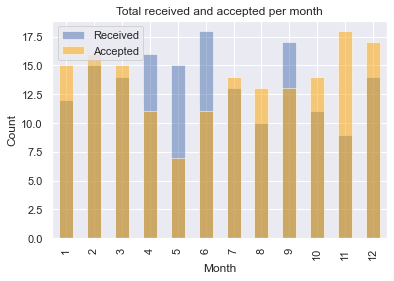

In [307]:
# compare both
ax = df_per_month.groupby(df_per_month.month)["total_received"].sum().plot(kind="bar", alpha=0.5, label="Received")
df_per_month.groupby(df_per_month.month)["total_accepted"].sum().plot(kind="bar", color="orange", alpha=0.5, label="Accepted", ax=ax)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(loc="upper left")
plt.title("Total received and accepted per month");

In [308]:
# check
month = 5
df_per_month[df_per_month.month == month].total_received.sum(), df_per_month[df_per_month.month == month].total_accepted.sum()

(15.0, 7.0)

In [282]:
df_accepted.groupby(df_accepted.month)["month"].count().sum()

51

In [283]:
df_received.groupby(df_received.month)["month"].count().sum()

43

In [276]:
df_received = df_received[df_received.year == 2022]
df_accepted = df_accepted[df_accepted.year == 2022]

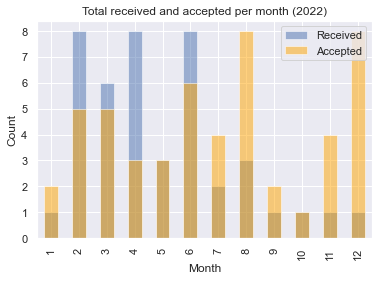

In [277]:
# compare both
ax = df_received.groupby(df_received.month)["month"].count().plot(kind="bar", alpha=0.5, label="Received")
df_accepted.groupby(df_accepted.month)["month"].count().plot(kind="bar", color="orange", alpha=0.5, label="Accepted", ax=ax)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.title("Total received and accepted per month (2022)");

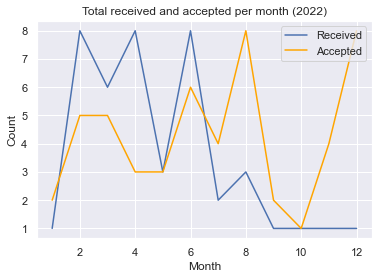

In [278]:
ax = df_received.groupby(df_received.month)["month"].count().plot(kind="line", label="Received")
df_accepted.groupby(df_accepted.month)["month"].count().plot(kind="line", color="orange", label="Accepted", ax=ax)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.title("Total received and accepted per month (2022)");

### Smooth curve

In [279]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

def smooth_plot(data, color, label):
    
    # create data
    x = np.arange(0, 12, 1)
    x_ticks = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    y = np.array(data)

    # define x as 200 equally spaced values between the min and max of original x 
    xnew = np.linspace(x.min(), x.max(), 200) 

    # define spline with degree k=7
    spl = make_interp_spline(x, y, k=7)
    y_smooth = spl(xnew)

    # create smooth line chart 
    plt.plot(xnew, y_smooth, color=color, label=label)

In [280]:
# smooth_plot(df_received.groupby(df_received["Received"].dt.month).count(), "lightblue", "Received")
# smooth_plot(df_accepted.groupby(df_accepted["Accepted"].dt.month).count(), "orange", "Accepted")
# plt.legend()

Note:
- Not always received date
- No accepted data for 2019-2020
- Received date: first received, then reviewed and corrections made? If so, date isn't representative because if article needs lot of changes, it will take longer to be accepted (or, difference between accepted & received in same month is not a valid measure, since articles often have to be sent back a few times?)